In [2]:
import pandas as pd
df=pd.read_csv('insurance.csv')

In [3]:
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# Convert Catagorical to Numeric variable
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes

df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes

df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes



In [6]:
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,1,30.970,3,0,1,10600.54830
1334,1334,18,0,31.920,0,0,0,2205.98080
1335,1335,18,0,36.850,0,0,2,1629.83350
1336,1336,21,0,25.800,0,0,3,2007.94500


In [7]:
# Check Null value
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Split Dependent and Independent feature
x=df.drop(columns='charges')
y=df['charges']
x

,index,age,sex,bmi,children,smoker,region
0,0,19,0,27.900,0,1,3
1,1,18,1,33.770,1,0,2
2,2,28,1,33.000,3,0,2
3,3,33,1,22.705,0,0,1
4,4,32,1,28.880,0,0,1
...,...,...,...,...,...,...,...
1333,1333,50,1,30.970,3,0,1
1334,1334,18,0,31.920,0,0,0
1335,1335,18,0,36.850,0,0,2
1336,1336,21,0,25.800,0,0,3


In [12]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [13]:
# Split data as a train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0) # random_stat will help you recreate the same train test split if necessary.


In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
model.intercept_

-11895.351121776972

In [17]:
model.coef_

array([ 3.31537787e-01,  2.54117819e+02, -2.93645723e+01,  3.29073256e+02,
        4.42004652e+02,  2.35574038e+04, -2.91921307e+02])

In [19]:
# Train accuracy
y_pred=model.predict(x_train)


Text(0, 0.5, 'Predicted Charges')

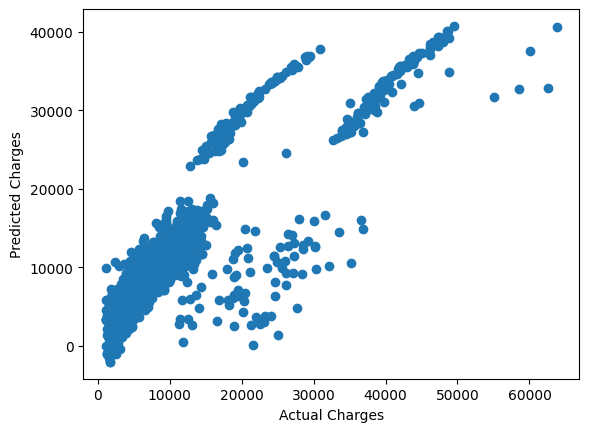

In [20]:
# For training
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

In [25]:
from sklearn.metrics import r2_score


In [26]:
# Train accuracy
r2_score(y_train,y_pred)

0.736942954209735

In [30]:
# Test acurracy
y_pred_test=model.predict(x_test)

Text(0, 0.5, 'Predicted Charges')

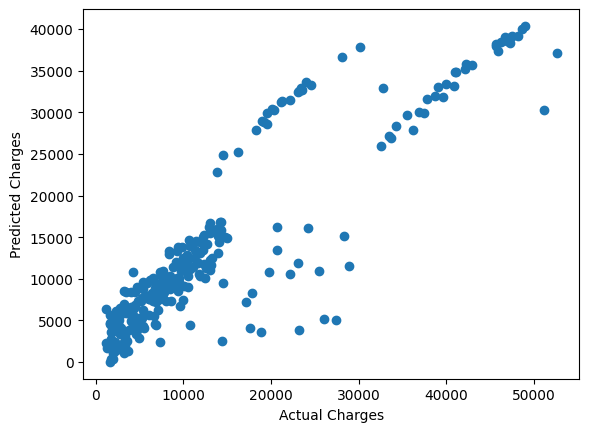

In [31]:
# For test
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

In [32]:
r2_score(y_test,y_pred_test)

0.7996058765429953